# Results for analisys of COVID data of Mexico at 2021/04/23
## Import libraries

In [91]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown as md
%matplotlib inline

## Importing dataset into panda dataframes

In [3]:
df_national = pd.read_csv('./data/filter_nat.csv')

In [4]:
df_dictionary_states = pd.read_excel('./data/diccionario_datos_covid19/201128 Catalogos.xlsx',
                                    sheet_name='Catálogo de ENTIDADES',
                                    index_col='CLAVE_ENTIDAD')
df_dictionary_clasification = pd.read_excel('./data/diccionario_datos_covid19/201128 Catalogos.xlsx',
                                    sheet_name='Catálogo CLASIFICACION_FINAL',
                                    index_col='CLAVE', 
                                    skiprows=2)

#### The dictionary contains the list of states, that will be used to fill our plots with information.

In [36]:
df_dictionary_states.head()

,ENTIDAD_FEDERATIVA,ABREVIATURA
CLAVE_ENTIDAD,,
1,AGUASCALIENTES,AS
2,BAJA CALIFORNIA,BC
3,BAJA CALIFORNIA SUR,BS
4,CAMPECHE,CC
5,COAHUILA DE ZARAGOZA,CL


In [40]:
states_code = df_dictionary_states.loc[:32,"ABREVIATURA"]
states_code.head()

CLAVE_ENTIDAD
1    AS
2    BC
3    BS
4    CC
5    CL
Name: ABREVIATURA, dtype: object

#### Clasification dictionary

In [6]:
df_dictionary_clasification.head(n=7)

,CLASIFICACIÓN,DESCRIPCIÓN
CLAVE,,
1,CASO DE COVID-19 CONFIRMADO POR ASOCIACIÓN CLÍ...,Confirmado por asociación aplica cuando el cas...
2,CASO DE COVID-19 CONFIRMADO POR COMITÉ DE DIC...,Confirmado por dictaminación solo aplica para ...
3,CASO DE SARS-COV-2 CONFIRMADO,Confirmado aplica cuando:\nEl caso tiene muest...
4,INVÁLIDO POR LABORATORIO,Inválido aplica cuando el caso no tienen asoci...
5,NO REALIZADO POR LABORATORIO,No realizado aplica cuando el caso no tienen a...
6,CASO SOSPECHOSO,Sospechoso aplica cuando: \nEl caso no tienen ...
7,NEGATIVO A SARS-COV-2,Negativo aplica cuando el caso:\n1. Se le tomo...


Filter positives cases indentified when **CLASIFICACION_FINAL** is 1,2 or 3. When **FECHA_DEF** is diferent to `999-999-99` is considered as a death case. We added the **DEATH** column in the positive dataset.

In [81]:
positives =  df_national.loc[df_national["CLASIFICACION_FINAL"] < 4,:]
# mask_alive = positives.loc[:,"FECHA_DEF"].str.contains('9999-99-99', na = False)
positives = positives.assign(DEATH=np.ones(positives.shape[0], dtype = np.int32))
positives.loc[positives["FECHA_DEF"]=='9999-99-99',"DEATH"] = 0
positives.head()

,ENTIDAD_RES,EDAD,DIABETES,FECHA_DEF,CLASIFICACION_FINAL,DEATH
0,9,41,2,9999-99-99,1,0
1,23,66,1,2020-07-21,2,1
8,12,47,1,9999-99-99,3,0
12,2,32,2,9999-99-99,1,0
14,22,54,2,9999-99-99,3,0


### Create a State category from State dictionary

In [82]:
positives["state"] = positives["ENTIDAD_RES"].astype("category")
positives["state"].cat.categories = states_code.iloc[:]

##### Rollup data by state

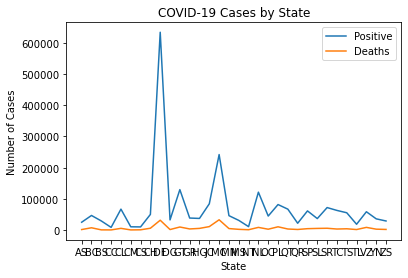

In [106]:
state_aggregate = positives[["state","DEATH"]].groupby("state").agg(['count', 'sum'])
positive_mean, death_mean = state_aggregate.mean()[0:2]
plt.plot(states_code, state_aggregate[('DEATH', 'count')], label="Positive")
plt.plot(states_code, state_aggregate[('DEATH', 'sum')], label="Deaths")
plt.title("COVID-19 Cases by State")
plt.xlabel('States')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

Stats

In [104]:
md("""# National stats
**Positive COVID19 mean:** {0:,.0f}

**Death by COVID19 mean:** {1:,.0f}
""".format(positive_mean, death_mean)
)

# National stats
**Positive COVID19 mean:** 72,485

**Death by COVID19 mean:** 6,690
